<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "C:\Data Science\My Datasets\Sacramento_transactions.csv"
data = pd.read_csv(house_csv)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
data.shape[0]

985

In [4]:
data.shape[1]

12

In [5]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
data.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [9]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
# Zip is categorical value, should be string
data['zip'] = data['zip'].astype(str)

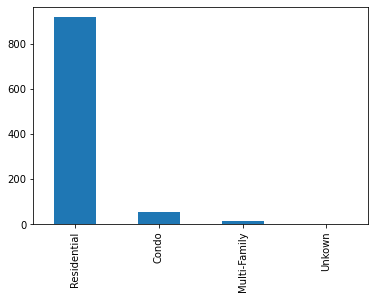

In [11]:
data.type.value_counts().plot(kind='bar')

In [12]:
data.loc[data.beds == 0,'type'] = 'Plot' 

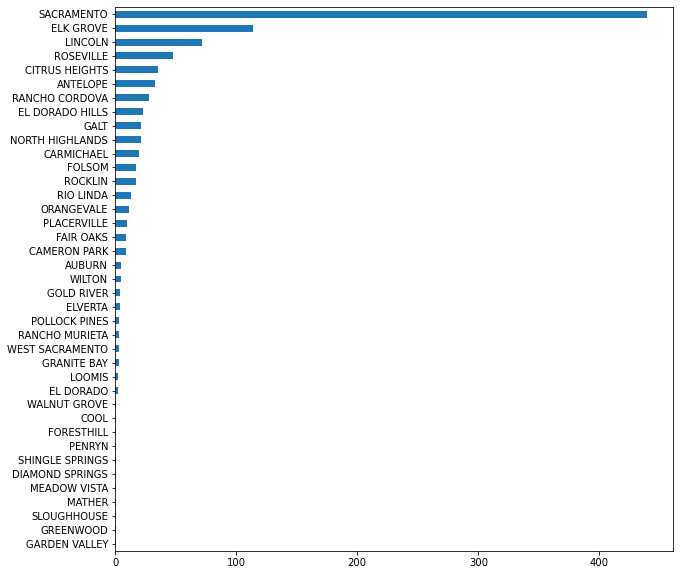

In [13]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(10,10));

In [14]:
import folium

# Make an empty map @ mean 'latitude', 'longitude'
map_sf = folium.Map(location=[38.607732, -121.355982])

for i in range (0, len(data)):
    folium.Marker(location=[data.iloc[i]['latitude'],data.iloc[i]['longitude']]).add_to(map_sf)

display(map_sf)
    

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

price, as our goal for assignment is to predict price based on the available features.

#### 2.2 List all possible variables which might be Predictor variable.

We will opt for the feature which displays the most coorelation with the target

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [15]:
corr = data.corr()
abs(corr[corr['price'] != 1]['price']).sort_values(ascending = False)

baths        0.416208
beds         0.342024
sq__ft       0.333897
longitude    0.284485
latitude     0.039573
Name: price, dtype: float64

The top 3 features are baths, beds, and sq_ft. Plotting them further to finalize our predicting feature. 

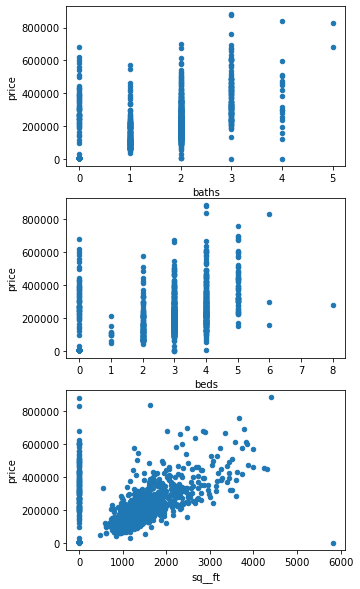

In [16]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

data.plot(kind='scatter', ax=ax1, x='baths', y='price')
data.plot(kind='scatter', ax=ax2, x='beds', y='price')
data.plot(kind='scatter', ax=ax3, x='sq__ft', y='price')

Since both beds and baths are discrete variables, and since sq_ft is displaying positive linearity, and hence, we will opt for sq_ft living as the best predictor.

#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [17]:
data.price.mean()

234144.26395939087

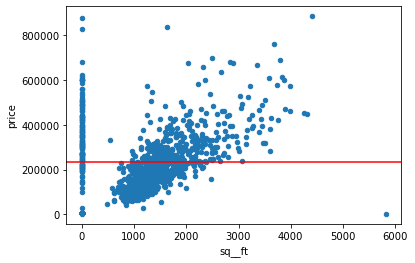

In [18]:
data.plot(kind='scatter', x='sq__ft', y='price')
plt.axhline(y=(data.price.mean()),c='r')

#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [19]:
res = abs(data['price'] - (data['price'].mean())).mean()
res

103452.16956891476

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [20]:
X1 = data['sq__ft']
X2 = data['baths']
Y = data['price']
Ybar = data['price'].mean()
X1bar = data['sq__ft'].mean()
X2bar = data['baths'].mean()

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [21]:
beta_1 = np.sum((Y - Ybar) * (X1 - X1bar))/np.sum(np.square(X1 - X1bar)) 
beta_1

54.158639688530755

In [22]:
beta_2 = np.sum((Y - Ybar) * (X2 - X2bar))/np.sum(np.square(X2 - X2bar)) 
beta_2

64318.535236734744

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [23]:
beta_0_1 = Ybar - (beta_1 * X1bar)
beta_0_1

162930.16140699777

In [24]:
beta_0_2 = Ybar - (beta_1 * X1bar) - (beta_2 * X2bar)
beta_0_2

48658.65210315431

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [25]:
Yhat_1 = beta_0_1 + (beta_1 * X1)
Yhat_1

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

In [26]:
Yhat_2 = beta_0_2 + (beta_1 * X1) + (beta_2 * X2)
Yhat_2

0      158253.810120
1      176180.319856
2      156087.464532
3      159120.348355
4      156141.623172
           ...      
980    365095.956303
981    257288.033397
982    243152.628438
983    268553.030452
984    251059.789832
Length: 985, dtype: float64

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [27]:
residual_1 = Y - Yhat_1
abs(residual_1)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

In [28]:
residual_2 = Y - Yhat_2
abs(residual_2)

0       99031.810120
1      107968.319856
2       87207.464532
3       89813.348355
4       74241.623172
           ...      
980    132670.956303
981     23288.033397
982      8152.628438
983     33252.030452
984     15321.789832
Length: 985, dtype: float64

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [29]:
SStot = np.sum(np.square(Y - Ybar))
SStot

18838783738865.37

In [30]:
SSres_1 = np.sum(np.square(Y - Yhat_1))
SSres_1

16738500924917.504

In [31]:
SSres_2 = np.sum(np.square(Y - Yhat_2))
SSres_2

16960678035516.55

In [32]:
r_square_1 = 1 - (SSres_1/SStot)
r_square_1

0.11148717682951459

In [33]:
r_square_2 = 1 - (SSres_2/SStot)
r_square_2

0.0996935752000907

##### 2.5.G [BONUS] Draw Plot of Predicted Line

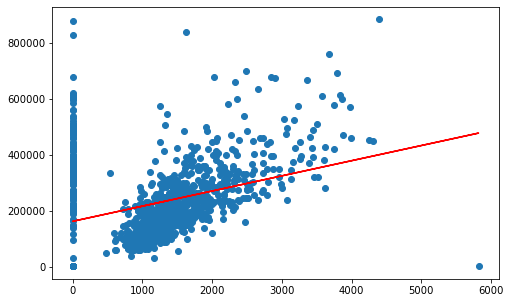

In [34]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.scatter(X1,Y)
ax.plot(X1,Yhat_1,c='r')
plt.show()

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

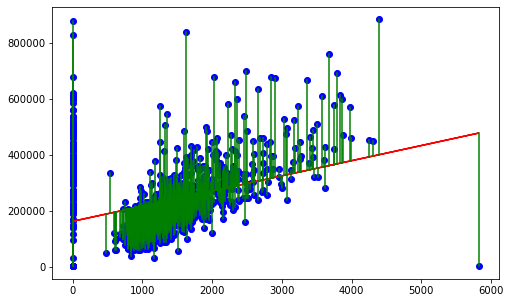

In [35]:
# create a figure
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X1, y=Y, c='b')
ax.plot(X1, Yhat_1, color='r')

for index, row in data.iterrows():
    plt.plot((row['sq__ft'],row['sq__ft']),(row['price'],Yhat_1.iloc[index]),c='green')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [36]:
xact = 1204
ypred_1 = beta_0_1 + (xact * beta_1)
ypred_1

228137.1635919888

In [37]:
xact = 1204
ypred_2 = beta_0_2 + (xact * beta_1) + (2 * beta_2)
ypred_2

242502.7247616148

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data[['sq__ft']],data['price'],test_size=0.2)

In [56]:
linregr = LinearRegression()
linregr.fit(x_train,y_train)
print (linregr.intercept_)
print (linregr.coef_)
pred = linregr.predict(x_test)

170659.25907105661
[48.58957455]


In [55]:
linregr.score(x_test, y_test)

0.17978803209303607

In [58]:
score = r2_score(x_test,pred)
print (score)

-82536.44825148546




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



